In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the libraries
import numpy as np
import pandas as pd

In [3]:
#importing the visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Setting the sytle as Whitegrid to keep it same style
sns.set(style="whitegrid")

In [4]:
#To see all columns and rows changing the pandas options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
# #Reading the "LEAD" Dataset CSV
df = pd.read_csv(r"C:\Users\Mohamed Thahir N\Documents\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
#Checking the Shape of dataset
df.shape

(9240, 37)

### Dataset has 9240 rows and 37 columns

In [7]:
# Lets check what are the different variables in the dataset
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [8]:
# Checking the summary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [9]:
# Checking the info to see the types of the feature variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Based on the info quite lot of null values present in the dataset and few categorical variables as well. For we need to treat them accordingly.

In [10]:
#Let Clean the dataset of missing values in each column
df.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [11]:
#check for duplicates for these two columns
sum(df.duplicated(subset = 'Prospect ID')) == 0
sum(df.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values found in Prospect ID & Lead Number and for these varaibles we can't create the duplicate variables.

In [12]:
#dropping Lead Number and Prospect ID since they have all unique values
df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [13]:
#Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [14]:
#checking percentage of null values in each column
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Get updates on DM Content                         0.00
Update me 

In [15]:
#Let drop the column which has greater missing and threshold value as 45%
for i in df.columns:
    if ((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, axis=1,inplace=True)

In [16]:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
Update me on Supply Chain Content                 0.00
Lead Origin                                       0.00
Digital Advertisement                             0.00
Get updates on DM Content                         0.00
I agree to pay the amount through cheque          0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Magazine  

In [17]:
#checking the Categorical Attributes value counts of "Country" column 
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

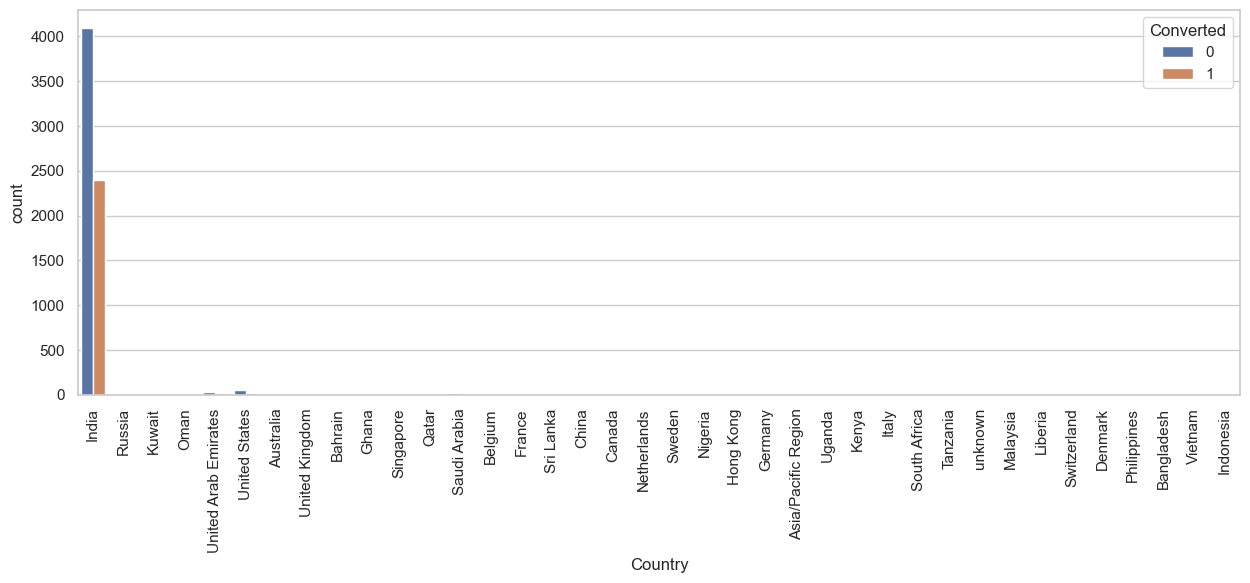

In [18]:
#plotting the Country columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

More than 97% Highest number of leads from INDIA so we can drop this column

In [19]:
#creating a list of columns to be droppped
columns_to_drop=['Country']

In [20]:
#checking the Categorical Attributes value counts of "City" column 
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
# Let replace NaN as Mumbai
df['City'] = df['City'].replace(np.nan,'Mumbai')

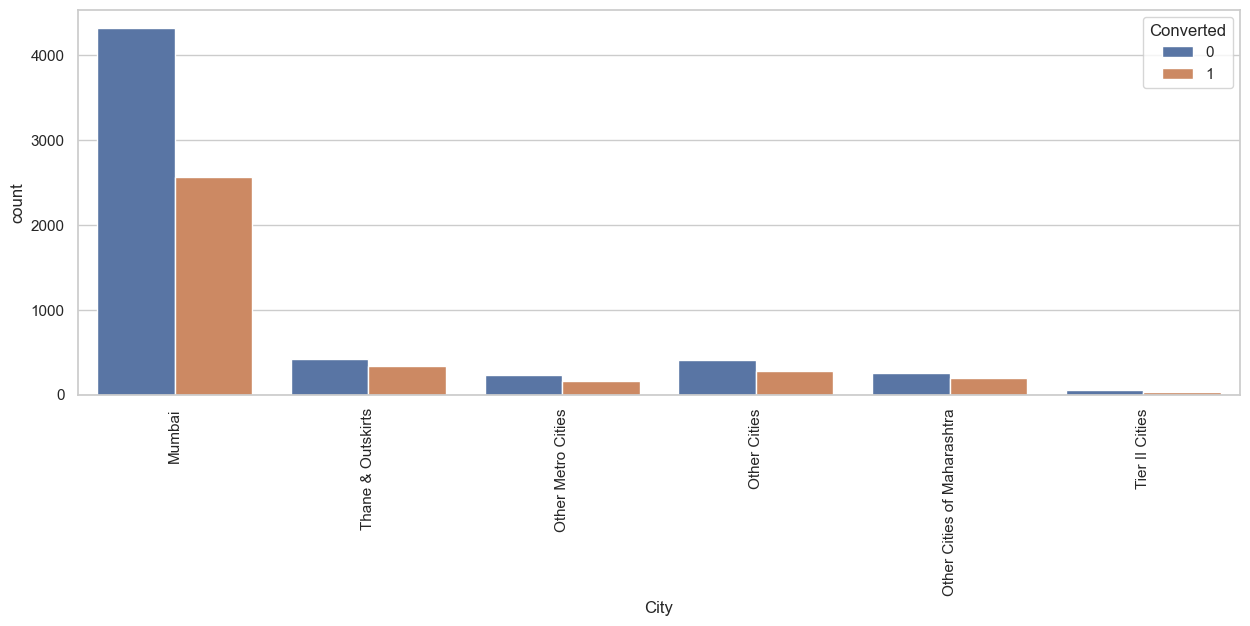

In [22]:
#plotting the City columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='City', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Mumbai has highest numbers of leads so the variable City can use in our analysis. So it's better to keep it as of now.

In [23]:
#checking the Categorical Attributes value counts of "Specialization" column 
df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Here Leads not mentioned specialization but this variable is little important hence replacing it with 'Not Specified'.

In [24]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

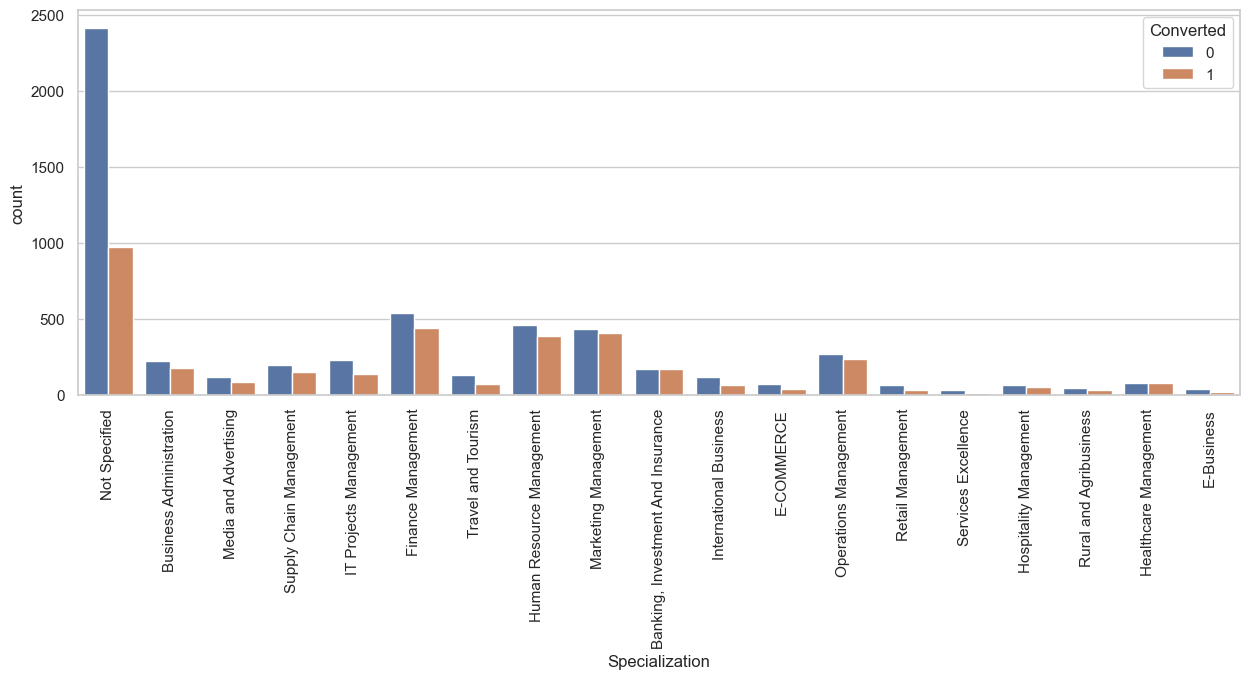

In [25]:
#plotting the Specialization columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

As per the chart, Management Specialization has higher number of leads as well as leads converted. Hence its a Significant variable so doesn't required to drop this column as well.

In [26]:
# Let merge all the management course 
df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management', 'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'] ,'Management_Specializations')

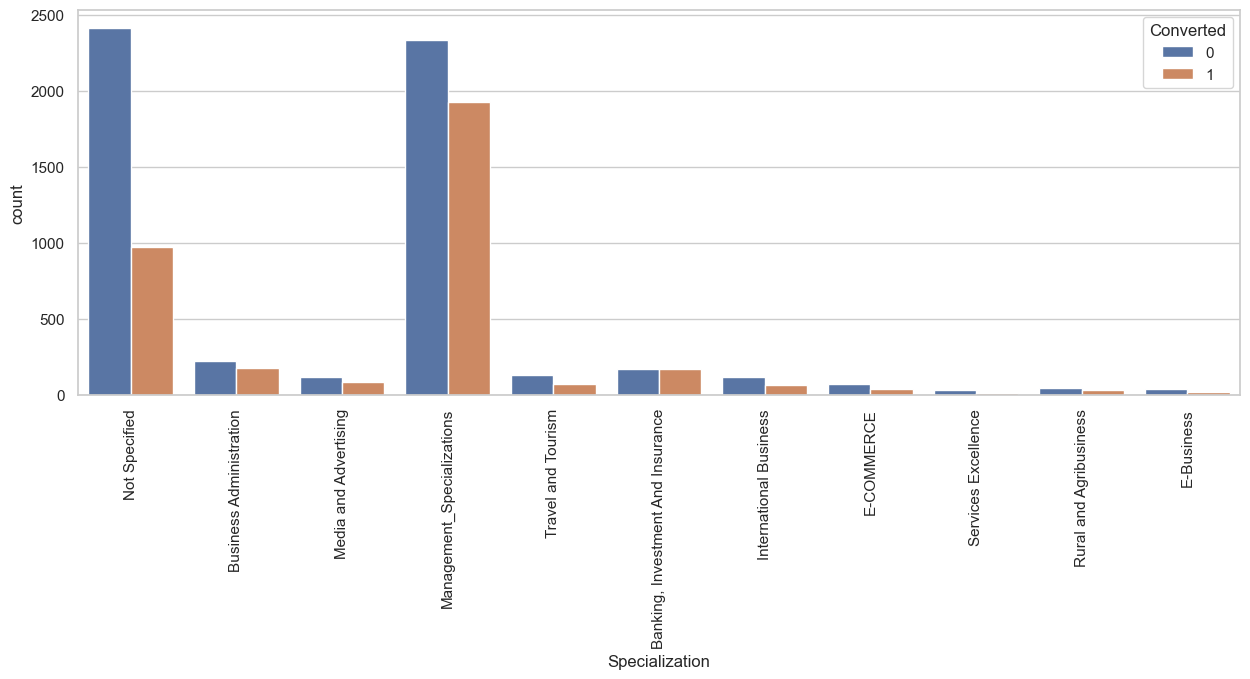

In [27]:
#plotting the Specialization columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [28]:
#Let focus on "What is your current occupation" this variable
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [29]:
#Let impute the Unemployee itself to NAN 
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [30]:
#checking count of values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

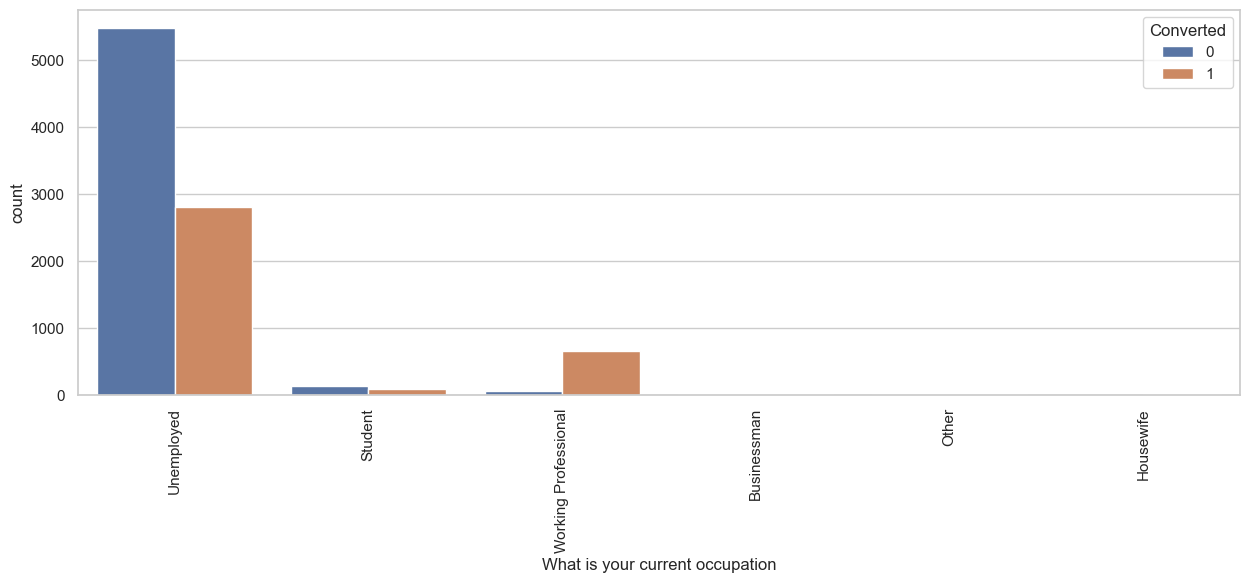

In [31]:
#plotting the "What is your current occupation" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

Here Unemployed leads are the most in numbers and Working Professionals as well and having high chances of joining it.

In [32]:
#Let focus on "What matters most to you in choosing a course" this variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [33]:
#Lets impute the Nan values with Mode "Better Career Prospects"
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

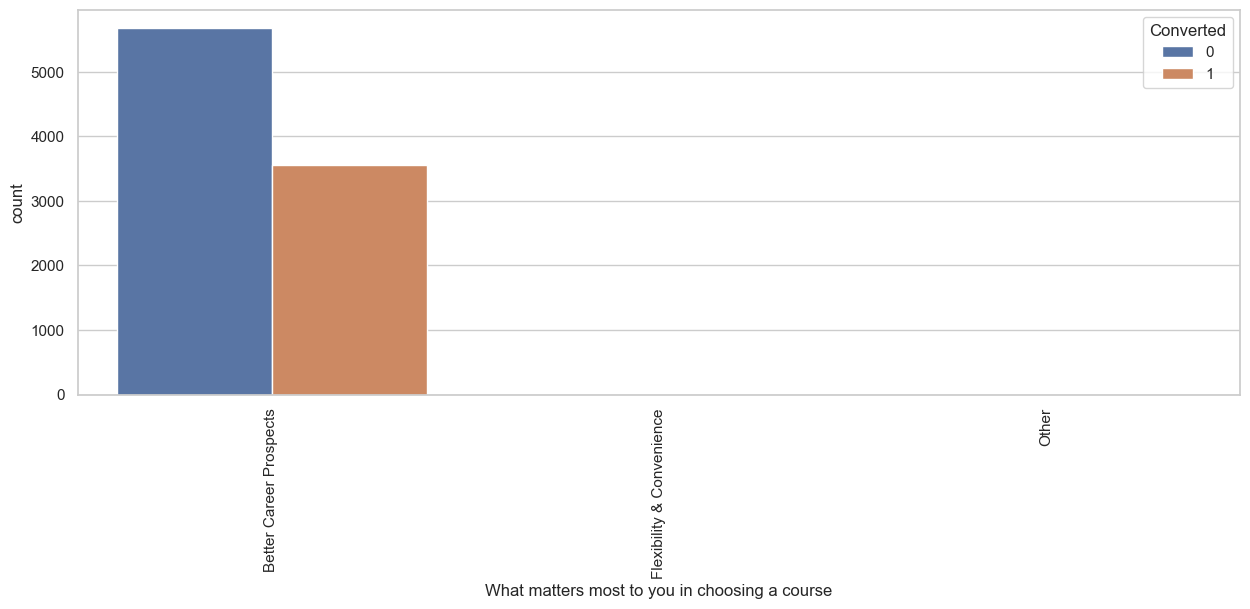

In [34]:
#plotting the "What is your current occupation" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [35]:
#checking value counts of variable
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

"Better Career Prospects" has highest count so we can drop this column

In [36]:
# Adding to drop the "What matters most to you in choosing a course" feature
columns_to_drop.append('What matters most to you in choosing a course')
columns_to_drop

['Country', 'What matters most to you in choosing a course']

In [37]:
#checking value counts of Tag variable
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [38]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

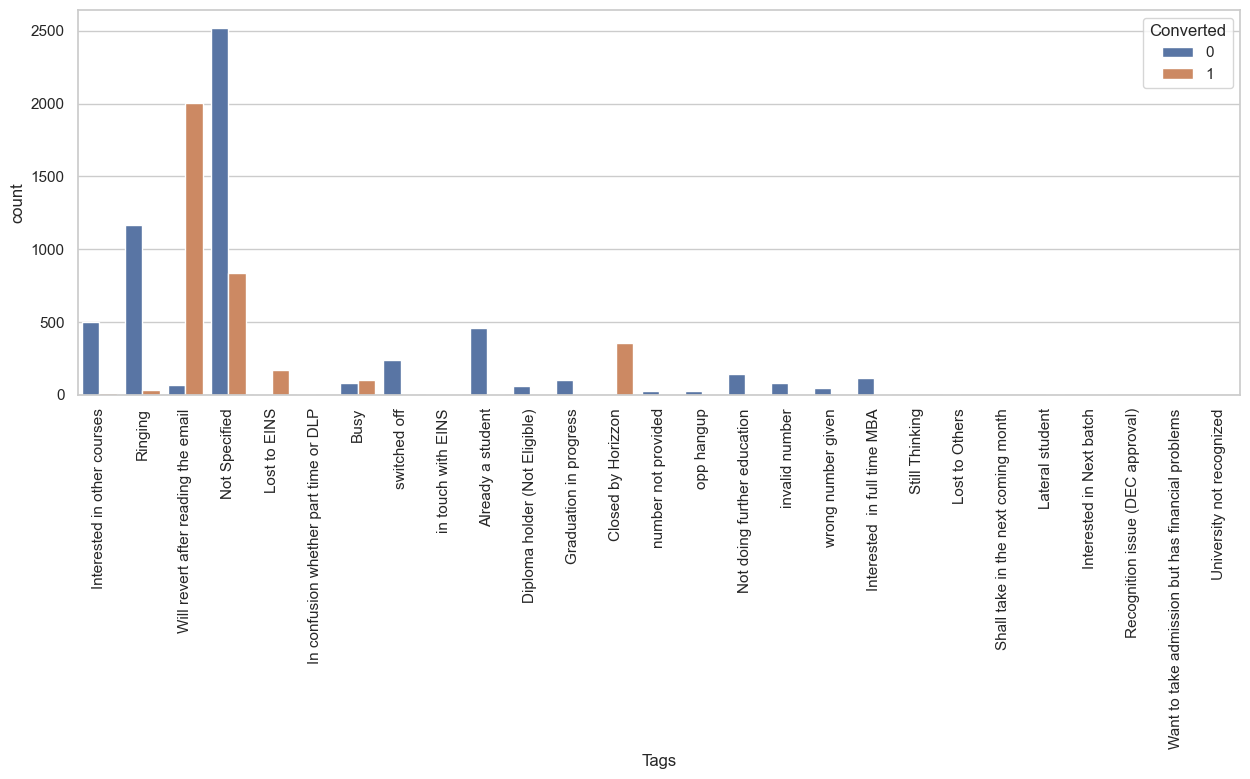

In [39]:
#plotting the "Tags" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Tags', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [40]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                       'invalid number','wrong number given','Interested  in full time MBA'] , 'Other_Tags')

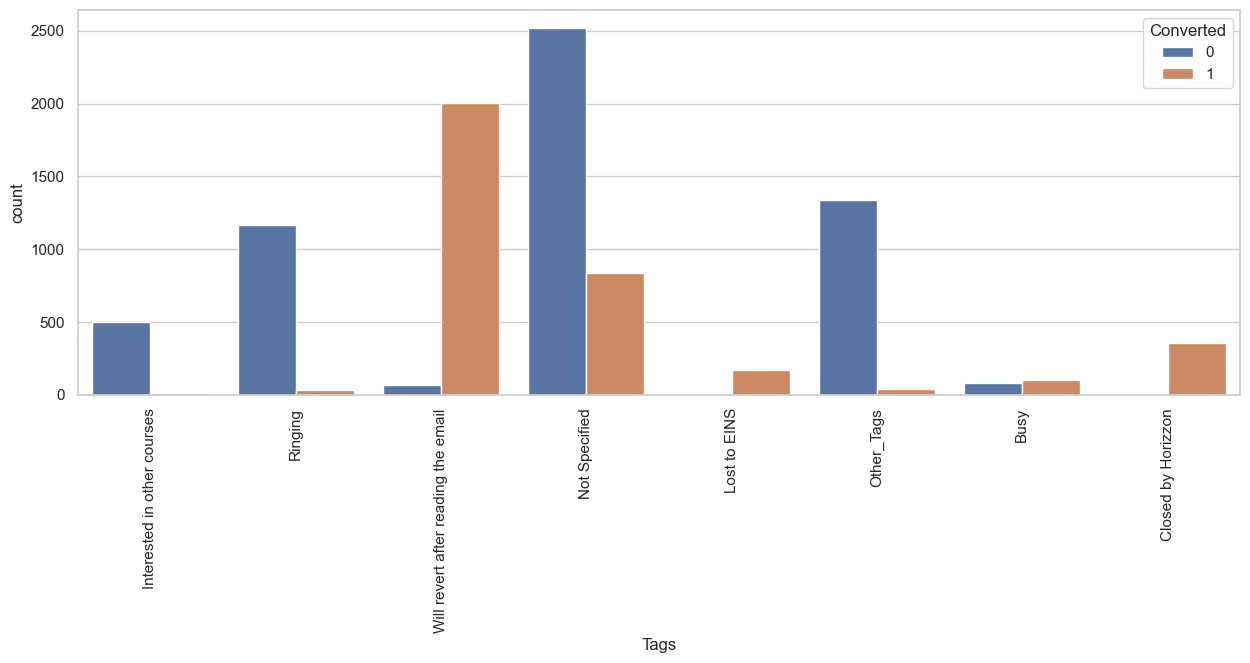

In [41]:
#plotting the "Tags" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Tags', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [42]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Newspaper                                         0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
City                                              0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Tags                                              0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Magazine                                          0.00
X Education Forums                                0.00
Newspaper 

In [43]:
#checking value counts of "Lead Source" column
df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [44]:
#replacing Nan Values and combining low frequency values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

In [45]:
df['Lead Source'] = df['Lead Source'].replace('google','Google')
df['Lead Source'] = df['Lead Source'].replace('Facebook','Social Media')

In [46]:
df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

In [47]:
df['Lead Source'].value_counts(dropna=False)

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

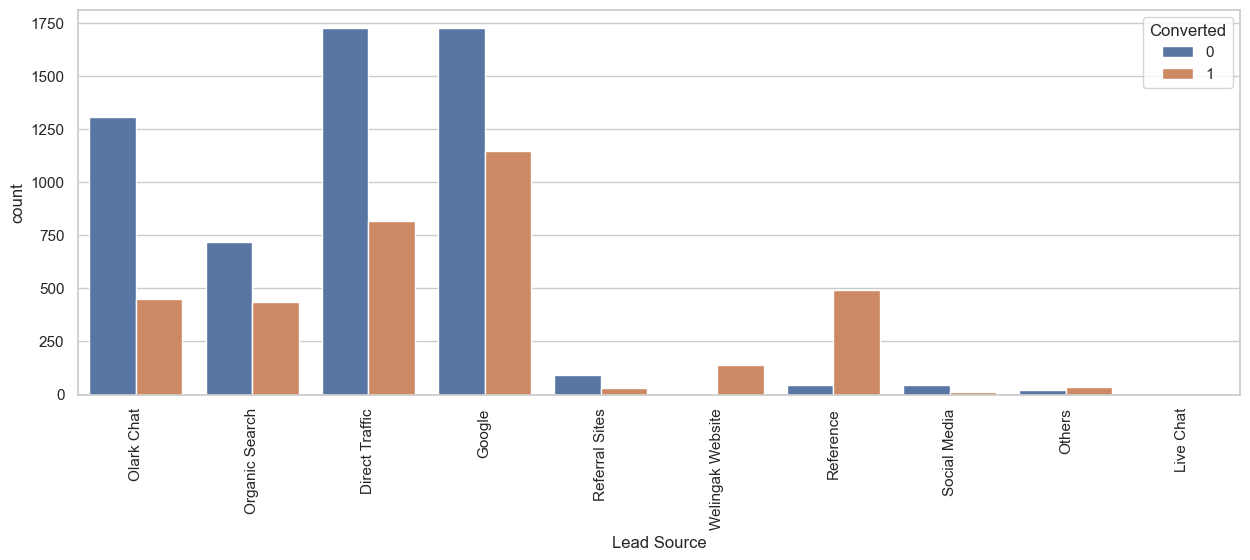

In [48]:
#plotting the "Lead Source" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Lead Source', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

- Google and direct traffic create the greatest quantity of leads.
- The conversion rate of reference leads and leads generated by the Welingak website is very high.
- To increase total lead conversion rate, focus on boosting lead conversion of olark chat, organic search, direct traffic, and google leads, as well as generating more leads from reference and welingak website.

In [49]:
#checking value counts of "Last Activity" column
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [50]:
#Imputing the NaN Values and combining low frequency values
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [51]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [52]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

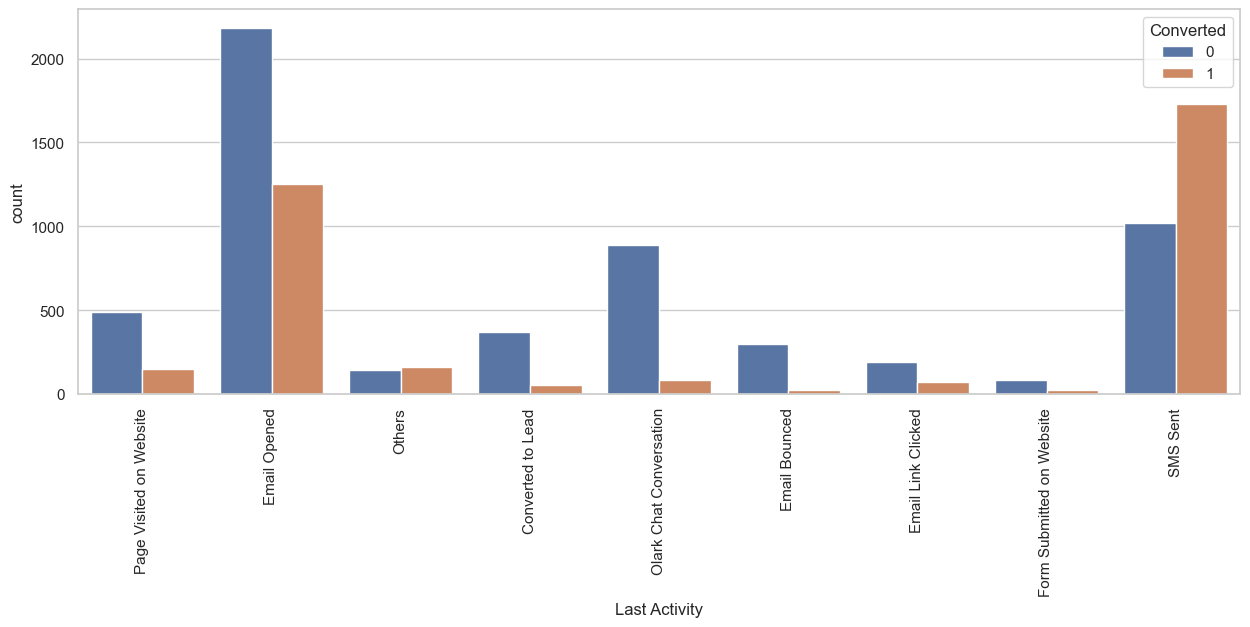

In [53]:
#plotting the "Last Activity" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Last Activity', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [54]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False)

Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Lead Origin                                       0.00
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
City                                              0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Tags                                              0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Magazine                                          0.00
Newspaper Article                                 0.00
Lead Source                                       0.00
Search    

In [55]:
#Drop all rows which have NaN Values. Since the number of Dropped rows is less than 2%, it will not affect the model
#threshold_percentage = 2
#missing_values_per_row = df.isnull().sum(axis=1)
#percentage_missing_per_row = (missing_values_per_row / len(df.columns)) * 100
#df = df[percentage_missing_per_row >= threshold_percentage]
df = df.dropna()

In [56]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

Lead Origin                                      0.0
Lead Source                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

In [57]:
#Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4850
API                        1902
Lead Add Form                27
Name: Lead Origin, dtype: int64

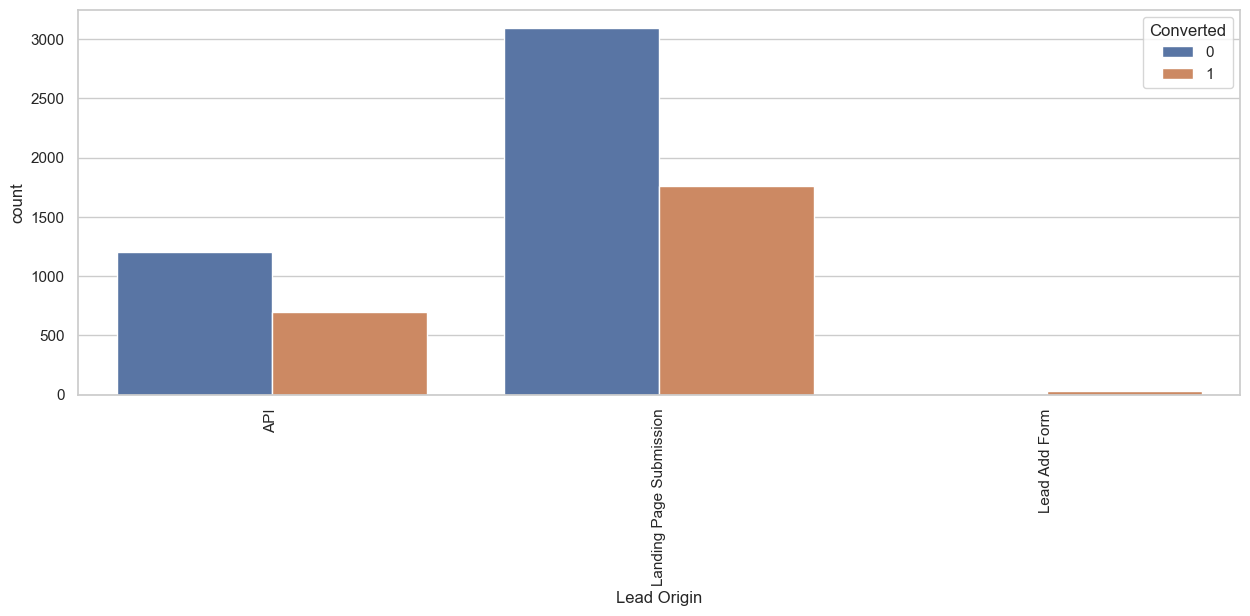

In [58]:
#plotting the "Lead Origin" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Lead Origin', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

- API and Landing Page Submission generate more leads and conversions.
- The Lead Add Form has a very good conversion rate, however the lead count is not particularly high.
- Lead Import and Quick Add Form both generate a small number of leads.
- To increase total lead conversion rate, we must boost lead generation from API and Landing Page Submission origins and produce more leads via Lead Add Form.

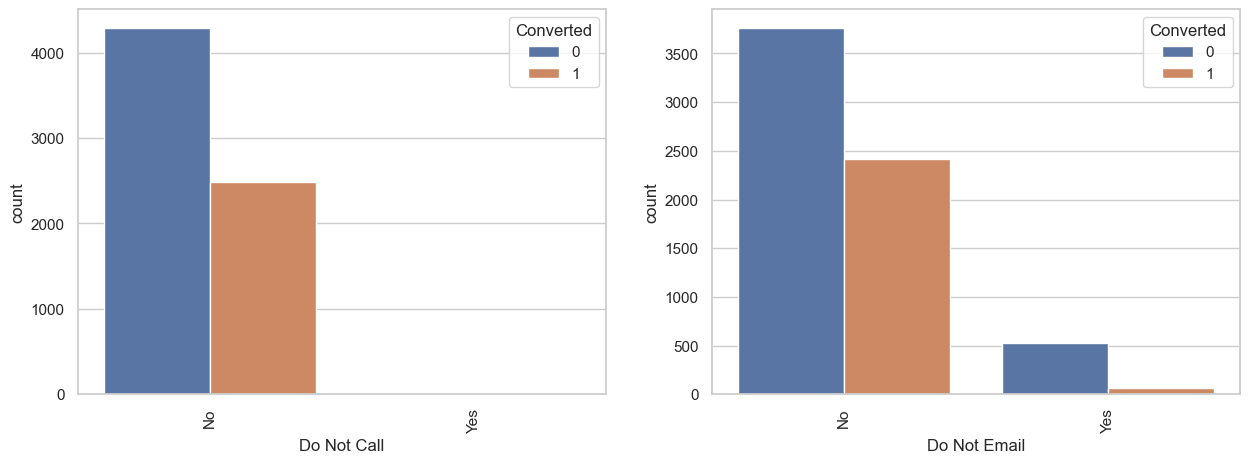

In [59]:
#Lets Visualize "Do Not Email" & "Do Not Call" Variables based on Converted value
plt.figure(figsize=(15,5))
ax1=plt.subplot(1, 2, 1)
s1 = sns.countplot(x='Do Not Call', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
ax2=plt.subplot(1, 2, 2)
s1 = sns.countplot(x='Do Not Email', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [60]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     6778
Yes       1
Name: Do Not Call, dtype: int64

In [61]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

No     6186
Yes     593
Name: Do Not Email, dtype: int64

Since its "Do Not Call" has 90% only one value

In [62]:
columns_to_drop.append('Do Not Call')
columns_to_drop

['Country', 'What matters most to you in choosing a course', 'Do Not Call']

In [63]:
df.Search.value_counts(dropna=False)

No     6765
Yes      14
Name: Search, dtype: int64

In [64]:
df.Magazine.value_counts(dropna=False)

No    6779
Name: Magazine, dtype: int64

In [65]:
df['Newspaper Article'].value_counts(dropna=False)

No     6777
Yes       2
Name: Newspaper Article, dtype: int64

In [66]:
df['X Education Forums'].value_counts(dropna=False)

No     6778
Yes       1
Name: X Education Forums, dtype: int64

In [67]:
df['Newspaper'].value_counts(dropna=False)

No     6778
Yes       1
Name: Newspaper, dtype: int64

In [68]:
df['Digital Advertisement'].value_counts(dropna=False)

No     6775
Yes       4
Name: Digital Advertisement, dtype: int64

In [69]:
df['Through Recommendations'].value_counts(dropna=False)

No     6772
Yes       7
Name: Through Recommendations, dtype: int64

In [70]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    6779
Name: Receive More Updates About Our Courses, dtype: int64

In [71]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    6779
Name: Update me on Supply Chain Content, dtype: int64

In [72]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    6779
Name: Get updates on DM Content, dtype: int64

In [73]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    6779
Name: I agree to pay the amount through cheque, dtype: int64

In [74]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     3913
Yes    2866
Name: A free copy of Mastering The Interview, dtype: int64

In [75]:
#Adding all this columns to the list of columns to be dropped
columns_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [76]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        2331
Email Opened                    2212
SMS Sent                        1643
Page Visited on Website          286
Email Link Clicked               106
Olark Chat Conversation           68
Email Bounced                     48
Unsubscribed                      40
Unreachable                       26
Had a Phone Conversation          14
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Email Marked Spam                  1
Name: Last Notable Activity, dtype: int64

In [77]:
#Merging all the lower frequency values
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable','Unsubscribed','Email Bounced',                                                                    
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')


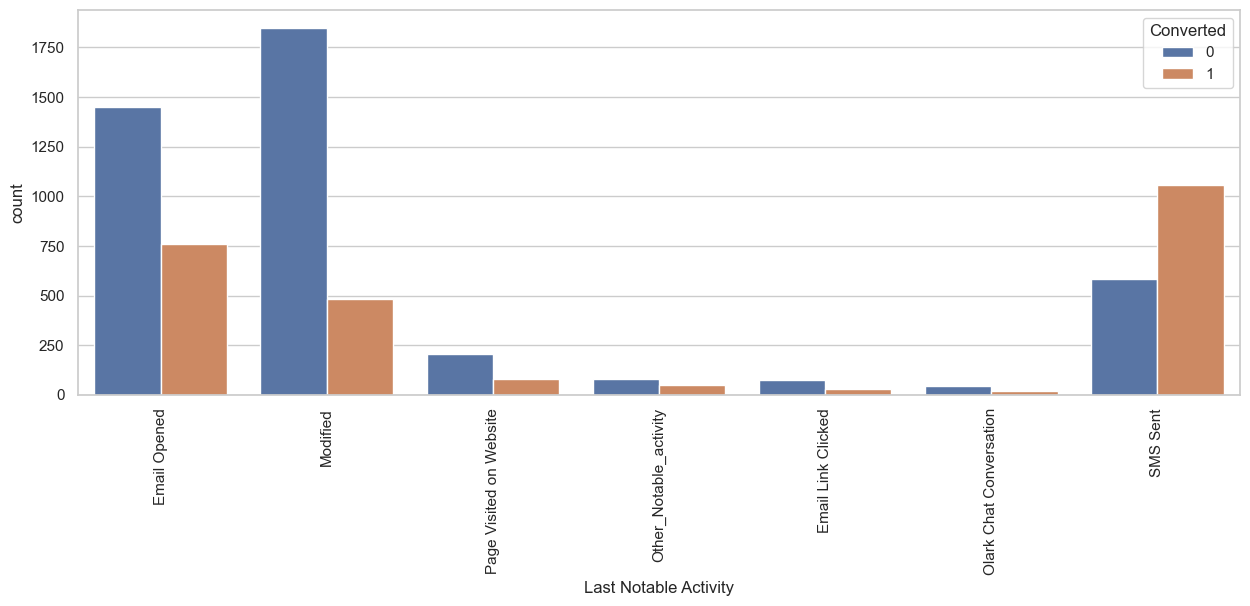

In [78]:
#plotting the "Last Notable Activity" columnn 
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Last Notable Activity', hue='Converted', data=df)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [79]:
#checking value counts for variable
df['Last Notable Activity'].value_counts()

Modified                   2331
Email Opened               2212
SMS Sent                   1643
Page Visited on Website     286
Other_Notable_activity      133
Email Link Clicked          106
Olark Chat Conversation      68
Name: Last Notable Activity, dtype: int64

In [80]:
#list of columns to be dropped
columns_to_drop

['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [81]:
#dropping columns
df = df.drop(columns_to_drop,1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6779 entries, 1 to 9239
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6779 non-null   object 
 1   Lead Source                             6779 non-null   object 
 2   Do Not Email                            6779 non-null   object 
 3   Converted                               6779 non-null   int64  
 4   TotalVisits                             6779 non-null   float64
 5   Total Time Spent on Website             6779 non-null   int64  
 6   Page Views Per Visit                    6779 non-null   float64
 7   Last Activity                           6779 non-null   object 
 8   Specialization                          6779 non-null   object 
 9   What is your current occupation         6779 non-null   object 
 10  Tags                                    6779 non-null   obje

So far we have handled every categorical Variable

In [82]:
#Now lets check the numerical % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

36.65732408909869

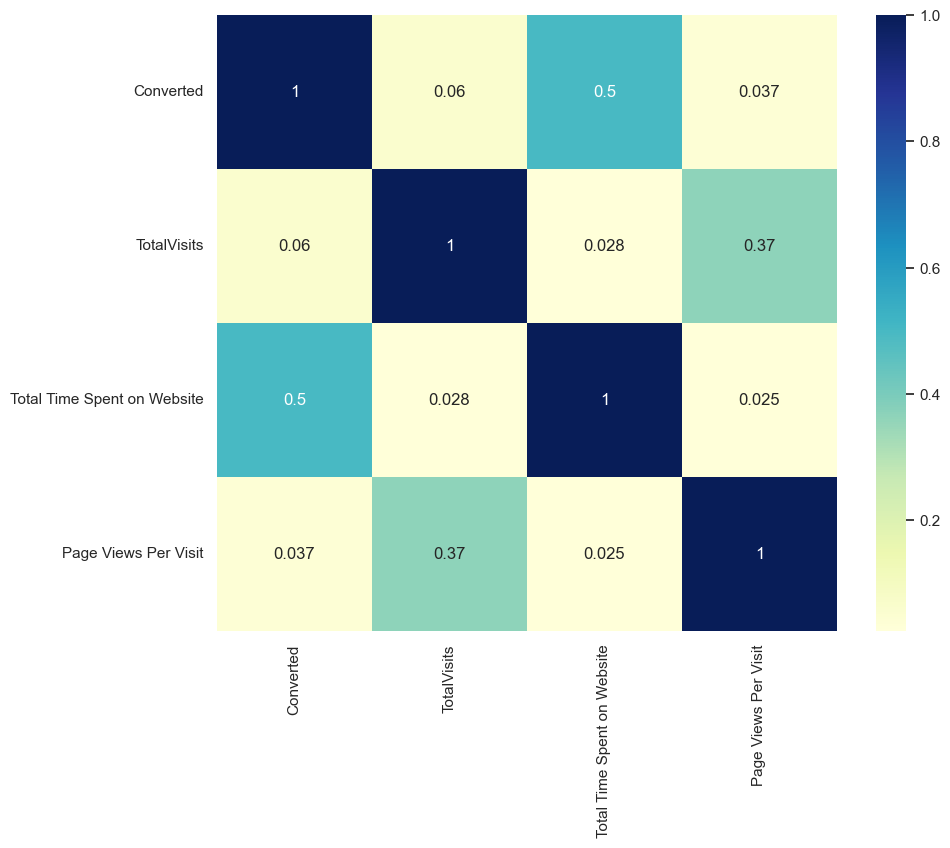

In [83]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))
# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

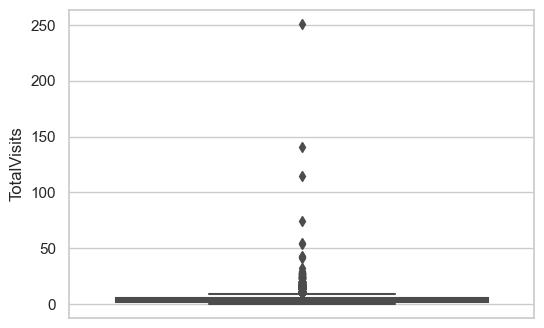

In [84]:
#visualizing the variable of Total Visits
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

Based on the boxplot we can see presence of outliers.

In [85]:
#checking percentile values for "Total Visits"
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6779.000000
mean        4.553917
std         5.138148
min         0.000000
5%          1.000000
25%         2.000000
50%         4.000000
75%         5.000000
90%         8.000000
95%        11.000000
99%        18.220000
max       251.000000
Name: TotalVisits, dtype: float64

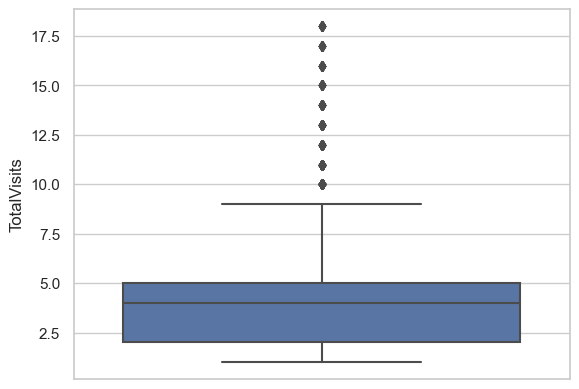

In [86]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values
Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [87]:
df.shape

(6706, 14)

In [88]:
#checking percentiles for "Total Time Spent on Website"
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    6706.000000
mean      631.736206
std       541.763382
min         0.000000
5%         33.000000
25%       171.000000
50%       397.000000
75%      1104.000000
90%      1451.500000
95%      1606.000000
99%      1862.950000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

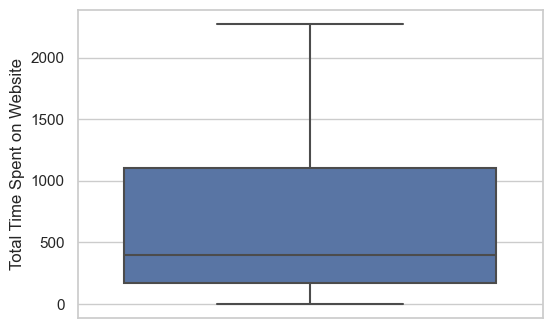

In [89]:
#visualizing spread of numeric variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

We are not doing any Outlier Treatment for the above Column because there are no significant outliers.

In [90]:
#checking spread of "Page Views Per Visit"
df['Page Views Per Visit'].describe()

count    6706.000000
mean        3.104545
std         1.817244
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

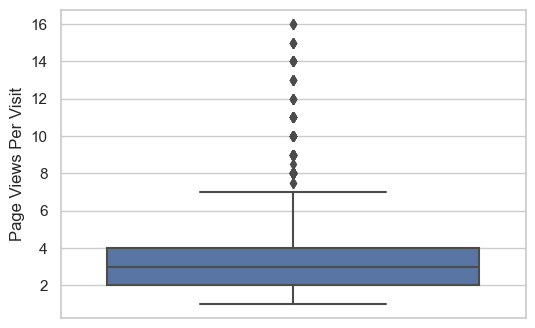

In [91]:
#visualizing spread of numeric variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

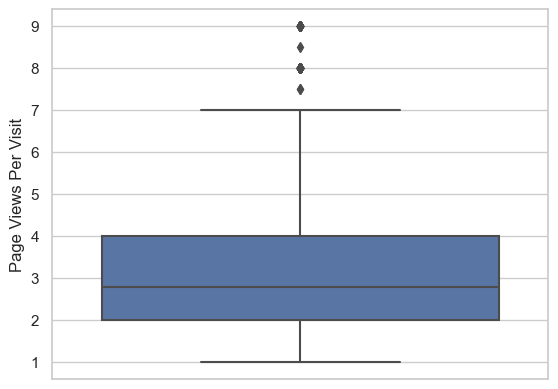

In [92]:
#Outlier Treatment: Remove top & bottom 1% 
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

In [93]:
df.shape

(6640, 14)

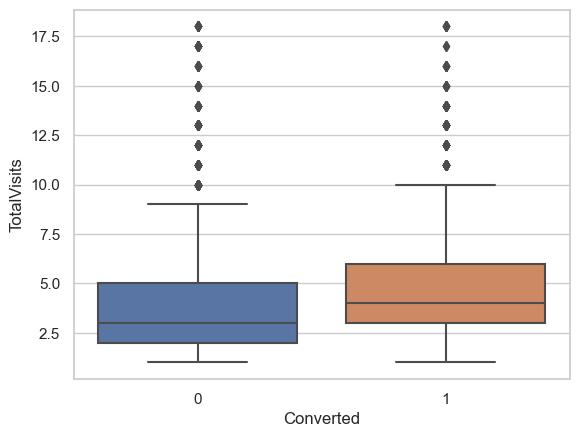

In [94]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

- The medians for converted and non-converted leads are very close.
- On the basis of Total Visits, nothing conclusive can be claimed.

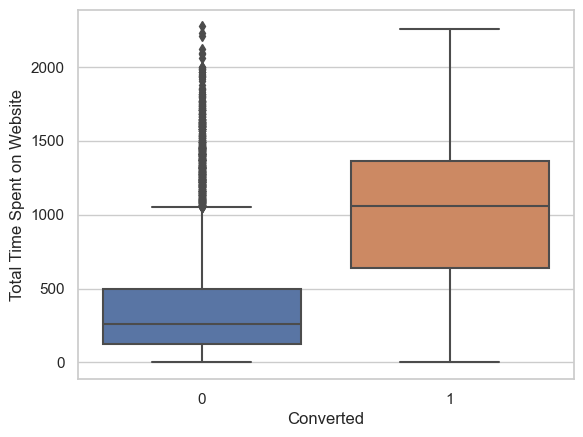

In [95]:
#checking Spread of "Total Time Spent on Website" vs Converted variable
sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

- Leads who spend more time on our website are more likely to convert.
- To encourage leads to spend more time on the website, it should be made more interesting.

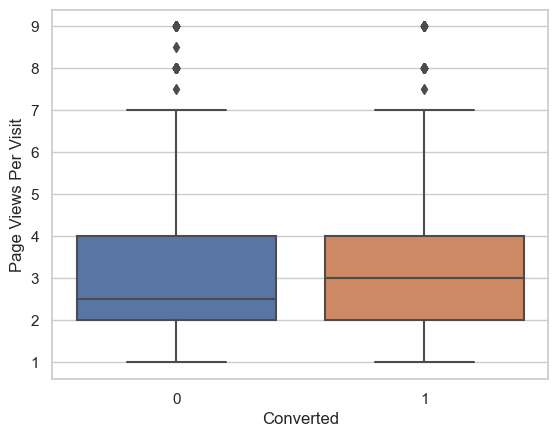

In [96]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

- The median is the same for converted and unconverted leads.
- Nothing specific can be said about lead conversion from Page Views Per Visit.

In [97]:
#checking missing values in leftover columns
round(100*(df.isnull().sum()/len(df.index)),2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

There are no missing values in the columns that need to be examined further.

In [98]:
# Let create the list of categorical columns for Dummy Variable Creation
catcategorical_columns= df.select_dtypes(include=['object']).columns
catcategorical_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [99]:
# List of variables to map
varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})
# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [100]:
#lets get dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation',
                             'City']], drop_first=True)
df = pd.concat([df,dummy],1)

In [101]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [102]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [104]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [105]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [106]:
#Let drop the original columns after dummy variable creation
df.drop(catcategorical_columns,1,inplace = True)

In [107]:
df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,1,2.0,1640,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


As per the data currently no categorical value are present in the dataset

In [108]:
# lets create the Train-Test Split & Logistic Regression Model Building:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = df['Converted']

y.head()

X=df.drop('Converted', axis=1)

In [109]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [110]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4648 entries, 1979 to 7849
Data columns (total 54 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           4648 non-null   float64
 1   Total Time Spent on Website                           4648 non-null   int64  
 2   Page Views Per Visit                                  4648 non-null   float64
 3   Lead Origin_Landing Page Submission                   4648 non-null   uint8  
 4   Lead Origin_Lead Add Form                             4648 non-null   uint8  
 5   What is your current occupation_Housewife             4648 non-null   uint8  
 6   What is your current occupation_Other                 4648 non-null   uint8  
 7   What is your current occupation_Student               4648 non-null   uint8  
 8   What is your current occupation_Unemployed            4

In [111]:
#let Start the Scaling process for our Dataset:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1979,0.668033,1.836717,1.846001,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6249,1.418399,1.230405,-0.225650,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5557,1.793583,1.857051,3.712353,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7865,1.793583,-0.645835,3.712353,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8491,-0.082334,0.086176,0.601766,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [112]:
# Let built the Model using Stats Model & RFE:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [113]:
# Create a logistic regression model
logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [126]:
# Displaying the selected features
selected_features = X_train.columns[rfe.support_]
selected_features

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [127]:
# Displaying the not selected features
Not_selected_features = list(X_train.columns[~rfe.support_])
Not_selected_features

['TotalVisits',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Student',
 'What is your current occupation_Unemployed',
 'City_Other Cities',
 'City_Other Cities of Maharashtra',
 'City_Other Metro Cities',
 'City_Thane & Outskirts',
 'City_Tier II Cities',
 'Specialization_Banking, Investment And Insurance',
 'Specialization_Business Administration',
 'Specialization_E-Business',
 'Specialization_E-COMMERCE',
 'Specialization_International Business',
 'Specialization_Management_Specializations',
 'Specialization_Media and Advertising',
 'Specialization_Rural and Agribusiness',
 'Specialization_Services Excellence',
 'Specialization_Travel and Tourism',
 'Lead Source_Direct Traffic',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Reference',
 'Lead Source_Referral Sites',
 'Lead Source_Social Media',


In [128]:
# Let start the Model_1 
X_train_sm = sm.add_constant(X_train[selected_features])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4632
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -873.41
Date:                Mon, 18 Dec 2023   Deviance:                       1746.8
Time:                        02:54:59   Pearson chi2:                 6.21e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6072
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4676      0.107    -13.703      0.000      -1.678      -1.258
Total Time Spent on Website                              1.1229      0.065     17.281      0.000       0.996       1.250
Lead Origin_Lead Add Form                               23.9666   4.01e+04      0.001      1.000   -7.85e+04    7.86e+04
What is your current occupation_Working Professional     1.3016      0.506      2.572      0.010       0.310       2.293
Last Activity_Converted to Lead                         -0.8961      0.359     -2.498      0.012      -1.599      -0.193
Last Activity_Email Bounced                             -1.6560      0.541     -3.062      0.002      -2.716      -0.596
Last Activity_Page Visited on Website                   -0.8274      0.277     -2.992      0.003      -1.369      -0.285
Last Notable Activity_Modified                          -0.4829      0.164     -2.943      0.003      -0.804      -0.161
Last Notable Activity_SMS Sent                           1.8894      0.157     12.048      0.000       1.582       2.197
Tags_Busy                                                0.9760      0.247      3.957      0.000       0.493       1.459
Tags_Closed by Horizzon                                 26.8976   1.82e+04      0.001      0.999   -3.56e+04    3.57e+04
Tags_Interested in other courses                        -2.1792      0.427     -5.104      0.000      -3.016      -1.342
Tags_Lost to EINS                                        5.1003      0.620      8.226      0.000       3.885       6.315
Tags_Other_Tags                                         -2.4656      0.241    -10.241      0.000      -2.937      -1.994
Tags_Ringing                                            -3.3904      0.285    -11.909      0.000      -3.948      -2.832
Tags_Will revert after reading the email                 4.5943      0.232     19.839      0.000       4.140       5.048
========================================================================================================================
"""

p-value of variable Lead Origin_Lead Add Form is high, so we can drop it.

In [129]:
#Let dropping column with high p-value
selected_features = selected_features.drop('Lead Origin_Lead Add Form',1)

In [130]:
# Let go ahead with Model_2
X_train_sm = sm.add_constant(X_train[selected_features])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4633
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -876.03
Date:                Mon, 18 Dec 2023   Deviance:                       1752.1
Time:                        02:56:40   Pearson chi2:                 6.22e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6067
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4565      0.107    -13.650      0.000      -1.666      -1.247
Total Time Spent on Website                              1.1256      0.065     17.333      0.000       0.998       1.253
What is your current occupation_Working Professional     1.2994      0.505      2.571      0.010       0.309       2.290
Last Activity_Converted to Lead                         -0.8890      0.358     -2.480      0.013      -1.591      -0.187
Last Activity_Email Bounced                             -1.6548      0.540     -3.062      0.002      -2.714      -0.595
Last Activity_Page Visited on Website                   -0.7755      0.272     -2.849      0.004      -1.309      -0.242
Last Notable Activity_Modified                          -0.4988      0.164     -3.045      0.002      -0.820      -0.178
Last Notable Activity_SMS Sent                           1.8808      0.157     12.006      0.000       1.574       2.188
Tags_Busy                                                0.9679      0.246      3.927      0.000       0.485       1.451
Tags_Closed by Horizzon                                 26.0114   1.13e+04      0.002      0.998   -2.21e+04    2.22e+04
Tags_Interested in other courses                        -2.1845      0.427     -5.116      0.000      -3.021      -1.348
Tags_Lost to EINS                                        5.0986      0.620      8.221      0.000       3.883       6.314
Tags_Other_Tags                                         -2.4732      0.241    -10.275      0.000      -2.945      -2.001
Tags_Ringing                                            -3.3970      0.285    -11.933      0.000      -3.955      -2.839
Tags_Will revert after reading the email                 4.5870      0.231     19.820      0.000       4.133       5.041
========================================================================================================================
"""

- p-value of variable Tags_Closed by Horizzon is high, so we can drop it.

In [131]:
#dropping column with high p-value
selected_features = selected_features.drop('Tags_Closed by Horizzon',1)

In [132]:
# Let go ahead with Model_3
X_train_sm = sm.add_constant(X_train[selected_features])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4634
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1002.0
Date:                Mon, 18 Dec 2023   Deviance:                       2004.0
Time:                        02:59:27   Pearson chi2:                 6.73e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5848
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1852      0.097    -12.165      0.000      -1.376      -0.994
Total Time Spent on Website                              1.1275      0.060     18.689      0.000       1.009       1.246
What is your current occupation_Working Professional     2.5887      0.383      6.752      0.000       1.837       3.340
Last Activity_Converted to Lead                         -1.2933      0.342     -3.780      0.000      -1.964      -0.623
Last Activity_Email Bounced                             -1.8427      0.482     -3.819      0.000      -2.788      -0.897
Last Activity_Page Visited on Website                   -0.4957      0.219     -2.259      0.024      -0.926      -0.066
Last Notable Activity_Modified                          -0.2242      0.142     -1.581      0.114      -0.502       0.054
Last Notable Activity_SMS Sent                           1.7159      0.153     11.210      0.000       1.416       2.016
Tags_Busy                                                0.6781      0.241      2.818      0.005       0.207       1.150
Tags_Interested in other courses                        -2.7184      0.430     -6.322      0.000      -3.561      -1.876
Tags_Lost to EINS                                        4.7163      0.624      7.559      0.000       3.493       5.939
Tags_Other_Tags                                         -2.7707      0.238    -11.655      0.000      -3.237      -2.305
Tags_Ringing                                            -3.6068      0.283    -12.725      0.000      -4.162      -3.051
Tags_Will revert after reading the email                 4.1923      0.224     18.680      0.000       3.752       4.632
========================================================================================================================
"""

- p-value of variable Last Notable Activity_Modified is high, so we can drop it.

In [133]:
#dropping column with high p-value
selected_features = selected_features.drop('Last Notable Activity_Modified',1)

In [134]:
# Let go ahead with Model_4
X_train_sm = sm.add_constant(X_train[selected_features])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4635
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1003.3
Date:                Mon, 18 Dec 2023   Deviance:                       2006.5
Time:                        03:04:13   Pearson chi2:                 6.94e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5846
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2716      0.082    -15.563      0.000      -1.432      -1.111
Total Time Spent on Website                              1.1247      0.060     18.673      0.000       1.007       1.243
What is your current occupation_Working Professional     2.6097      0.384      6.788      0.000       1.856       3.363
Last Activity_Converted to Lead                         -1.4313      0.331     -4.323      0.000      -2.080      -0.782
Last Activity_Email Bounced                             -1.9216      0.479     -4.011      0.000      -2.861      -0.983
Last Activity_Page Visited on Website                   -0.5171      0.219     -2.364      0.018      -0.946      -0.088
Last Notable Activity_SMS Sent                           1.8006      0.144     12.504      0.000       1.518       2.083
Tags_Busy                                                0.6753      0.241      2.803      0.005       0.203       1.148
Tags_Interested in other courses                        -2.7730      0.429     -6.461      0.000      -3.614      -1.932
Tags_Lost to EINS                                        4.6804      0.624      7.496      0.000       3.457       5.904
Tags_Other_Tags                                         -2.7670      0.238    -11.633      0.000      -3.233      -2.301
Tags_Ringing                                            -3.5927      0.284    -12.671      0.000      -4.148      -3.037
Tags_Will revert after reading the email                 4.2091      0.224     18.793      0.000       3.770       4.648
========================================================================================================================
"""

- p-value of variable Last Activity_Page Visited on Website is high so we can drop it

In [135]:
#dropping column with high p-value
selected_features = selected_features.drop('Last Activity_Page Visited on Website',1)

In [136]:
# Let go ahead with Model_5
X_train_sm = sm.add_constant(X_train[selected_features])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4636
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1006.2
Date:                Mon, 18 Dec 2023   Deviance:                       2012.4
Time:                        03:17:01   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5841
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3342      0.078    -17.090      0.000      -1.487      -1.181
Total Time Spent on Website                              1.1176      0.060     18.646      0.000       1.000       1.235
What is your current occupation_Working Professional     2.5705      0.389      6.603      0.000       1.807       3.334
Last Activity_Converted to Lead                         -1.3744      0.331     -4.153      0.000      -2.023      -0.726
Last Activity_Email Bounced                             -1.8573      0.479     -3.878      0.000      -2.796      -0.919
Last Notable Activity_SMS Sent                           1.8629      0.142     13.130      0.000       1.585       2.141
Tags_Busy                                                0.6630      0.241      2.756      0.006       0.192       1.135
Tags_Interested in other courses                        -2.7372      0.427     -6.408      0.000      -3.574      -1.900
Tags_Lost to EINS                                        4.7141      0.623      7.561      0.000       3.492       5.936
Tags_Other_Tags                                         -2.7626      0.237    -11.646      0.000      -3.228      -2.298
Tags_Ringing                                            -3.5794      0.283    -12.628      0.000      -4.135      -3.024
Tags_Will revert after reading the email                 4.2244      0.224     18.873      0.000       3.786       4.663
========================================================================================================================
"""

- p-value of variable Tags_Busy is high so we can drop it

In [137]:
#dropping column with high p-value
selected_features = selected_features.drop('Tags_Busy',1)

In [138]:
# Let go ahead with Model_6
X_train_sm = sm.add_constant(X_train[selected_features])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4648
Model:                            GLM   Df Residuals:                     4637
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1010.0
Date:                Mon, 18 Dec 2023   Deviance:                       2020.0
Time:                        03:20:17   Pearson chi2:                 6.91e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5834
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2907      0.076    -17.010      0.000      -1.439      -1.142
Total Time Spent on Website                              1.1140      0.060     18.673      0.000       0.997       1.231
What is your current occupation_Working Professional     2.5490      0.391      6.520      0.000       1.783       3.315
Last Activity_Converted to Lead                         -1.3894      0.330     -4.211      0.000      -2.036      -0.743
Last Activity_Email Bounced                             -1.8856      0.477     -3.953      0.000      -2.821      -0.951
Last Notable Activity_SMS Sent                           1.9213      0.141     13.639      0.000       1.645       2.197
Tags_Interested in other courses                        -2.7810      0.427     -6.512      0.000      -3.618      -1.944
Tags_Lost to EINS                                        4.6742      0.623      7.497      0.000       3.452       5.896
Tags_Other_Tags                                         -2.8286      0.237    -11.956      0.000      -3.292      -2.365
Tags_Ringing                                            -3.6596      0.283    -12.941      0.000      -4.214      -3.105
Tags_Will revert after reading the email                 4.1764      0.223     18.712      0.000       3.739       4.614
========================================================================================================================
"""

- We can check the Variance Inflation Factor to see whether there is a correlation between the variables because 'All' of the p-values are fewer.

In [140]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [141]:
# Creating the dataframe with all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[selected_features].columns
vif['VIF'] = [variance_inflation_factor(X_train[selected_features].values, i) for i in range(X_train[selected_features].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Will revert after reading the email,1.59
4,Last Notable Activity_SMS Sent,1.38
1,What is your current occupation_Working Profes...,1.26
0,Total Time Spent on Website,1.16
7,Tags_Other_Tags,1.11
8,Tags_Ringing,1.11
2,Last Activity_Converted to Lead,1.07
3,Last Activity_Email Bounced,1.04
5,Tags_Interested in other courses,1.03
6,Tags_Lost to EINS,1.01


Based on the values, everything appears to be in order, therefore we can proceed to derive the Probabilities, Lead Score, and Predictions on Train Data:

In [142]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1979    0.935633
6249    0.519975
5557    0.113992
7865    0.003437
8491    0.007735
2573    0.131868
474     0.024910
4477    0.972852
1952    0.072865
1816    0.000739
dtype: float64

In [143]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([9.35632849e-01, 5.19975073e-01, 1.13991916e-01, 3.43695224e-03,
       7.73465966e-03, 1.31867572e-01, 2.49103360e-02, 9.72851784e-01,
       7.28647705e-02, 7.39024107e-04])

In [144]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.935633,1979
1,0,0.519975,6249
2,0,0.113992,5557
3,0,0.003437,7865
4,0,0.007735,8491


In [145]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.935633,1979,1
1,0,0.519975,6249,1
2,0,0.113992,5557,0
3,0,0.003437,7865,0
4,0,0.007735,8491,0


In [146]:
#lets check confusion matrix
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2807,  154],
       [ 263, 1424]], dtype=int64)

In [147]:
# Let's focus on the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9102839931153184

In [148]:
# True Positive 
TP = confusion[1,1]
# True Negatives
TN = confusion[0,0] 
# False Positives
FP = confusion[0,1]
# False Negatives
FN = confusion[1,0] 

In [149]:
#Sensitivity of our logistic regression model
TP / float(TP+FN)

0.8441019561351512

In [150]:
# Then specificity
TN / float(TN+FP)

0.9479905437352246

In [151]:
# False Postive Rate
FP/ float(TN+FP)

0.05200945626477541


In [152]:
# positive predictive value 
TP / float(TP+FP)

0.9024081115335868

In [153]:
# Negative predictive value
TN / float(TN+ FN)

0.9143322475570033

In [154]:
#Lets check with the ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [155]:
# Performance of a classification model
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

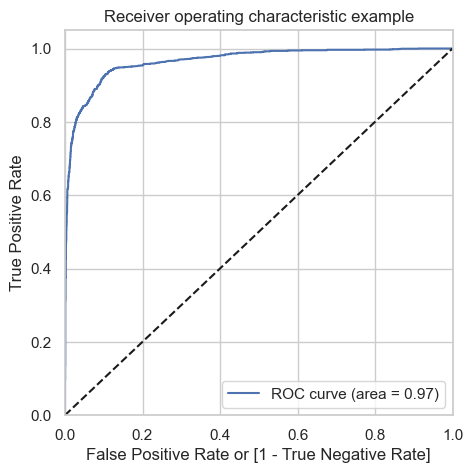

In [156]:
# Performance of a classification model
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- The ROC Curve should be close to 1. We receive a nice value of 0.97, which refers to a good prediction model.

In [ ]:
# Let's find out the Optimal Cutoff point

We picked an arbitrary cut-off value of 0.5 earlier. We must identify the best cut-off value, which is covered in the following section:

In [157]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.935633,1979,1,1,1,1,1,1,1,1,1,1,1
1,0,0.519975,6249,1,1,1,1,1,1,1,0,0,0,0
2,0,0.113992,5557,0,1,1,0,0,0,0,0,0,0,0
3,0,0.003437,7865,0,1,0,0,0,0,0,0,0,0,0
4,0,0.007735,8491,0,1,0,0,0,0,0,0,0,0,0


In [159]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.362952,0.644339,0.991219
0.1,0.1,0.810886,0.644339,0.991219
0.2,0.2,0.902324,0.644339,0.991219
0.3,0.3,0.908133,0.644339,0.991219
0.4,0.4,0.910499,0.644339,0.991219
0.5,0.5,0.910284,0.644339,0.991219
0.6,0.6,0.911360,0.644339,0.991219
0.7,0.7,0.903830,0.644339,0.991219
0.8,0.8,0.895439,0.644339,0.991219
0.9,0.9,0.865318,0.644339,0.991219


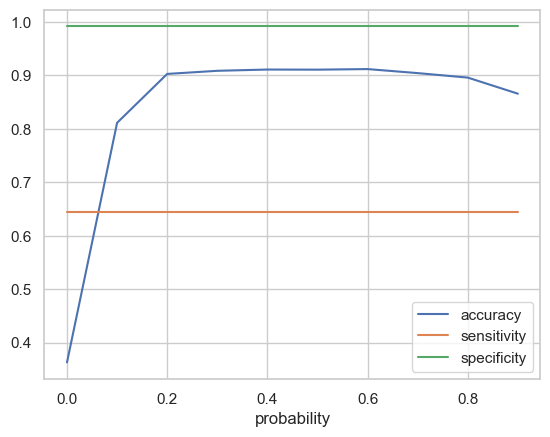

In [160]:
# Let's plot accuracy of sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [161]:
# According to the curve above, 0.3 is the best point to use as a cutoff probability.
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.935633,1979,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.519975,6249,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.113992,5557,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.003437,7865,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.007735,8491,0,1,0,0,0,0,0,0,0,0,0,0


In [162]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.935633,1979,1,94
1,0,0.519975,6249,1,52
2,0,0.113992,5557,0,11
3,0,0.003437,7865,0,0
4,0,0.007735,8491,0,1


In [163]:
# Let's check the overall accuracy again.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9081325301204819

In [165]:
# Let's go ahead with second confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion_2

array([[2668,  293],
       [ 134, 1553]], dtype=int64)

In [166]:
# True Positive 
TP = confusion_2[1,1]
# True Negatives
TN = confusion_2[0,0] 
# False Positives
FP = confusion_2[0,1]
# False Negatives
FN = confusion_2[1,0] 

In [167]:
# Repeating the process again sensitivity 
TP/float(TP+FN)

0.920569057498518

In [168]:
#specificity
TN/float(TN+FP)

0.901046943600135

Observation:
As we can see above, the model appears to be working well. The ROC curve has a value of 0.97, which is good. The Train Data has the following values:
- Accuracy : 90.81%
- Sensitivity : 92.05%
- Specificity : 90.10%

Some of the additional statistics are shown below, including the False Positive Rate, Positive Predictive Value, Negative Predictive Values, Precision, and Recall.

In [169]:
#False Postive Rate
FP/float(TN+FP)

0.09895305639986492

In [171]:
# Positive predictive value 
TP/float(TP+FP)

0.8412784398699892

In [173]:
# Negative predictive value
TN/float(TN+ FN)

0.9521770164168452

In [174]:
#Again Looking at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2668,  293],
       [ 134, 1553]], dtype=int64)

In [175]:
# Precision
TP/TP+FP

294.0

In [176]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8412784398699892

In [177]:
# Recall
TP/TP+FN

135.0

In [178]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.920569057498518

In [179]:
#importing precision_score, recall_score library
from sklearn.metrics import precision_score, recall_score

In [180]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8412784398699892

In [181]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.920569057498518

In [182]:
#importing precision recall curve library
from sklearn.metrics import precision_recall_curve

In [183]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

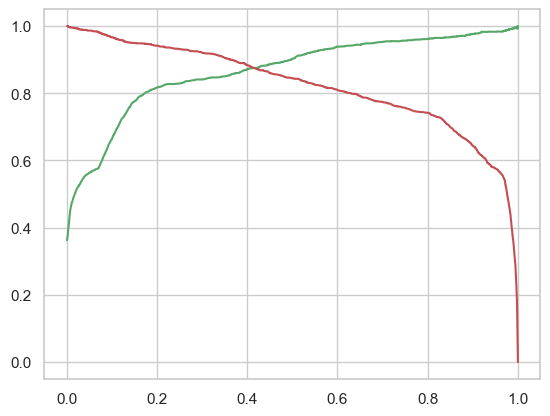

In [184]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [185]:
#scaling test dataset
numerical_columns=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numerical_columns] = scaler.fit_transform(X_test[numerical_columns])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-1.144209,-0.560701,-1.266390,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
8280,-0.783851,-0.236439,-0.628396,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6941,-0.783851,-1.021301,-1.266390,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7343,4.621518,0.028867,-0.545456,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3734,-0.063135,-0.582810,0.647593,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [186]:
X_test = X_test[selected_features]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Notable Activity_SMS Sent,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
8970,-0.560701,0,1,0,0,1,0,0,0,0
8280,-0.236439,0,0,0,0,0,0,0,0,0
6941,-1.021301,0,0,0,0,1,0,0,0,0
7343,0.028867,0,0,0,0,0,0,0,0,1
3734,-0.582810,0,0,0,0,0,0,0,0,0


In [187]:
X_test_sm = sm.add_constant(X_test)

In [189]:
#Let's predict on Test Dataset
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8970    0.002270
8280    0.174495
6941    0.005435
7343    0.948724
3734    0.125653
7889    0.598194
837     0.005358
8227    0.019962
7245    0.999419
8622    0.913947
dtype: float64

In [191]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
8970,0.002270
8280,0.174495
6941,0.005435
7343,0.948724
3734,0.125653


In [192]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [193]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [194]:
# Removing the index from each dataframes in order to append them side by side.
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [196]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,8970,0.002270
1,0,8280,0.174495
2,0,6941,0.005435
3,0,7343,0.948724
4,0,3734,0.125653


In [198]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,8970,0.002270
1,0,8280,0.174495
2,0,6941,0.005435
3,0,7343,0.948724
4,0,3734,0.125653


In [199]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,8970,0,0.002270,0
1,8280,0,0.174495,17
2,6941,0,0.005435,1
3,7343,0,0.948724,95
4,3734,0,0.125653,13


In [200]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,8970,0,0.002270,0,0
1,8280,0,0.174495,17,0
2,6941,0,0.005435,1,0
3,7343,0,0.948724,95,1
4,3734,0,0.125653,13,0


In [201]:
# Finally let check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9091365461847389

In [203]:
confusion_3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion_3

array([[1140,  118],
       [  63,  671]], dtype=int64)

In [204]:
# True Positive 
TP = confusion_3[1,1]
# True Negatives
TN = confusion_3[0,0] 
# False Positives
FP = confusion_3[0,1]
# False Negatives
FN = confusion_3[1,0]

In [205]:
#sensitivity
TP/float(TP+FN)

0.9141689373297003

In [206]:
#specificity
TN/float(TN+FP)

0.9062003179650239

In [207]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8504435994930292

In [208]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9141689373297003

Observation:

The following figures are obtained after running the model on the Test Data:
- Specificity: 90.62% 
- Accuracy: 90.92%
- Sensitivity: 91.41%

Finally, consider the following:
Let us compare the results for Train and Test:

Train Data:
- Accuracy : 90.81%
- Sensitivity : 92.05% 
- specificity : 90.10%

Test Data:
- Accuracy : 90.92%
- Sensitivity : 91.41%
- Specificity : 90.62%


The Model appears to accurately anticipate the Conversion Rate, and we should be able to give the CEO confidence in making appropriate decisions based on this model.